# Set Up The Environment

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

# Setup work directory
os.chdir('/Users/deankuo/Desktop/python/dissertation/Taiwan-Manifesto-Analysis-A-ML-Approach')
os.listdir()

# Import utils.py
from Utils.utils import (
    load_dataframe, 
    fill_education, 
    fill_age, 
    party_plot, 
    party_processing, 
    content_processing,
    dataset_cleaning,
    is_main_party,
    vote_calculate,
    find_duplicate_lnames,
    )

# Set up matplotlib
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Raw Data Processing

In [2]:
# Read csv files
years = [1992, 1995, 1998, 2001, 2004, 2008, 2012, 2016, 2020, 2024]
dfs = dict()

for year in years:
    dfs[year] = pd.read_excel(f"./Data/manifesto_data/taiwan_manifesto_{year}.xlsx")

for key, value in dfs.items():
    dfs[key] = load_dataframe(value, int(key))

## Find Duplicate Candidates' names

In [3]:
# Print out if there exists duplicate names
find_duplicate_lnames(dfs)

1992
1995
1998
2001
2012
2016
2020
2024


## Rename
Due to the duplicate names of candidates, I apply the following rename rules:
1. Add district name after.
2. If the candidates are in the same district, add their party instead.

# Coding Rules

## Party

1: 國民黨  
2: 民進黨  
3: 親民黨  
4: 新黨  
5: 無黨團結聯盟  
6: 台聯黨  
7: 無黨籍  
8: 台灣民眾黨  
9: 時代力量  
10: 台灣團結聯盟  
20: 其他  

In [4]:
for key, value in dfs.items():
    dfs[key] = party_processing(value)
    dfs[key] = content_processing(value)

In [5]:
# Party encoding
unique_counts = []

for year in years:
    df = dfs[year]
    unique_count = len(df['PARTY'].unique())
    print(f"{year} 的參選政黨有：")
    print(df['PARTY'].unique())
    unique_counts.append(unique_count)

1992 的參選政黨有：
['中國全民福利黨' '民進黨' '國民黨' '中華社會民主黨' '無' '中國團結黨' '中國大同民主黨' '中國人民行動黨' '中興黨'
 '中國中青黨' '中國忠義黨' '勞動黨' '真理黨' '工黨']
1995 的參選政黨有：
['國民黨' '新黨' '無' '民進黨' '永遠黨外' '勞動黨' '公民黨' '全國民主非政黨聯盟']
1998 的參選政黨有：
['國民黨' '新黨' '無' '民進黨' '民主聯盟' '全國民主非政黨聯盟' '建國黨' '新國家連線' '永遠黨外' '中國青年黨' '綠黨'
 '國家民主黨']
2001 的參選政黨有：
['國民黨' '新黨' '無' '台灣團結聯盟' '親民黨' '民進黨' '建國黨' '台灣吾黨' '大中華統一陣線' '臺灣慧行志工黨'
 '全國民主非政黨聯盟' '綠黨']
2004 的參選政黨有：
['國民黨' '台聯黨' '無' '無黨團結聯盟' '民進黨' '親民黨' '新黨' '建國黨' '工教聯盟' '台灣慧行志工黨']
2008 的參選政黨有：
['國民黨' '紅黨' '民進黨' '大道慈悲濟世黨' '客家黨' '台聯黨' '無' '台灣農民黨' '民主自由黨' '第三社會黨' '公民黨'
 '綠黨' '制憲聯盟' '無黨團結聯盟' '親民黨' '世界和平黨' '洪運忠義黨' '台灣團結聯盟']
2012 的參選政黨有：
['國民黨' '民進黨' '台灣主義黨' '親民黨' '綠黨' '中華民國臺灣基本法連線' '人民最大黨' '無' '新黨' '健保免費連線'
 '人民民主陣線' '台灣國民會議' '無黨團結聯盟' '正黨' '健保免費陣線' '中華民國臺灣基本法陣線' '中華民國愛國黨']
2016 的參選政黨有：
['自由台灣黨' '國民黨' '無' '民進黨' '中華統一促進黨' '樹黨' '台灣團結聯盟' '親民黨' '軍公教聯盟黨' '和平鴿聯盟黨'
 '信心希望聯盟' '大愛憲改聯盟' '健保免費聯線' '新黨' '台灣獨立黨' '民國黨' '綠黨社會民主黨聯盟' '台灣工黨' '時代力量'
 '人民民主陣線' '健保免費連線' '社會福利黨' '泛盟黨' '正黨' '勞工黨' '中華民國機車黨' '台灣未來黨']
2020 的參選政黨有：
['勞動黨'

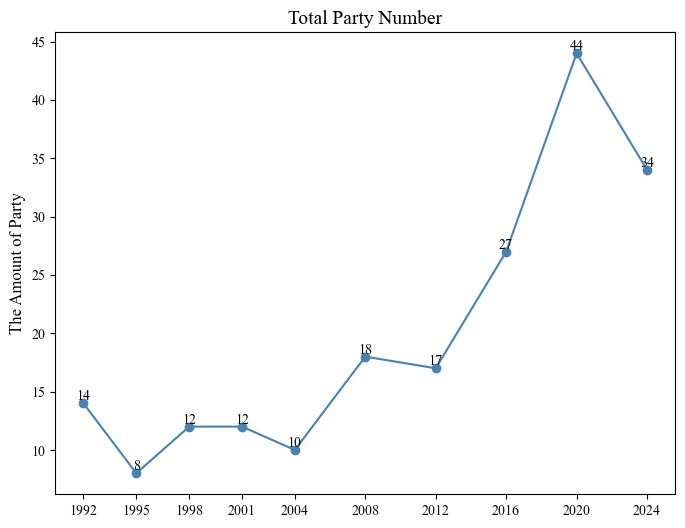

In [6]:
party_plot(unique_counts, years, save=True)

# Merge Voting Data and Manifesto Data

In [7]:
dfs_vote = {}
for year in years:
    dfs_vote[year] = pd.read_csv(f"./Data/vote_data/vote_{year}.csv")
    dfs_vote[year]['LNAME'] = dfs_vote[year]['LNAME'].apply(lambda x: x.strip())

## Vote Data Cleaning

In [9]:
dfs_vote_updated, education_differences = fill_education(dfs_vote)
dfs_vote_updated = fill_age(dfs_vote)
print("Education differences:", education_differences)

Education differences: []


In [183]:
for k, v in dfs_vote.items():
    v.to_csv(f'./Data/vote_data/vote_{k}.csv', encoding='utf-8-sig', index=False)

## Data Merge

In [10]:
for year in years:
    globals()[f'df_{year}'] = pd.merge(dfs[year], dfs_vote[year], on='LNAME', how='outer')
    
# 2008年的資料包含到補選候選人，需要先排除
df_2008 = df_2008.dropna(subset=['性別'])

# Data Cleaning

In [11]:
for year in years:
    globals()[f"df_{year}"] = dataset_cleaning(globals()[f"df_{year}"])
    print(year)

1992
1995
1998
2001
2004
2008
2012
2016
2020
2024


# Classify serious and non-serious candidates
- 依照公職人員選舉罷免法第43條第1項規定：候選人除全國不分區及僑居國外國民立法委員選舉外，當選人在一人，得票數達各該選舉區當選票數三分之一以上者，當選人在二人以上，得票數達各該選舉區當選票數二分之一以上者，應補貼其競選費用，每票補貼新臺幣三十元。但其最高額，不得超過各該選舉區候選人競選經費最高金額。
- 主要政黨有：國民黨、民進黨、親民黨、新黨、無黨團結聯盟、台聯黨、台灣民眾黨、時代力量、台灣團結聯盟

In [9]:
import uuid
for year in years:
    globals()[f'df_{year}']['ENOUGH_VOTE'] = globals()[f'df_{year}'].groupby('AREA', group_keys=False).apply(vote_calculate)
    globals()[f'df_{year}']['MAIN_PARTY_MEMBER'] = is_main_party(globals()[f'df_{year}'])
    globals()[f'df_{year}']['SERIOUS_CANDIDATE'] = globals()[f'df_{year}'][['ENOUGH_VOTE', 'MAIN_PARTY_MEMBER']].any(axis=1).astype(int)
    
    # uuid
    num_rows = len(globals()[f'df_{year}'])
    uuids = [str(uuid.uuid4()) for _ in range(num_rows)]
    globals()[f'df_{year}'].insert(0, 'ID', uuids)
    globals()[f'df_{year}'].to_excel(f'./Data/merge_data/{year}.xlsx', index=False)

# Combine The Dataset

In [10]:
# ALL Manifestos
df = pd.concat([df_1992, df_1995, df_1998, df_2001, df_2004, df_2008, df_2012, df_2016, df_2020, df_2024]).reset_index(drop=True)
print(f"所有的資料筆數為： {len(df)}")
df.info()

所有的資料筆數為： 3452
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3452 entries, 0 to 3451
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3452 non-null   object 
 1   LNAME              3452 non-null   object 
 2   TH                 3452 non-null   int64  
 3   AREA               3452 non-null   object 
 4   PARTY              3452 non-null   object 
 5   PARTY_CODE         3452 non-null   int64  
 6   GENDER             3452 non-null   int64  
 7   INCUMBENT          3452 non-null   int64  
 8   EDUCATION          3452 non-null   object 
 9   ELE                3452 non-null   int64  
 10  VOTES              3452 non-null   int64  
 11  VOTER_TURNOUT      3452 non-null   float64
 12  CONTENT            3452 non-null   object 
 13  ENOUGH_VOTE        3452 non-null   bool   
 14  MAIN_PARTY_MEMBER  3452 non-null   bool   
 15  SERIOUS_CANDIDATE  3452 non-null   int64  
dtypes: bool(2

In [11]:
df.to_excel('./Data/manifesto_dataset.xlsx', index=False)